# 確認

# mor

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952     True
29977     True
29978     True
Name: mor, Length: 4697, dtype: object

mor
False    2755
True     1942
Name: count, dtype: int64

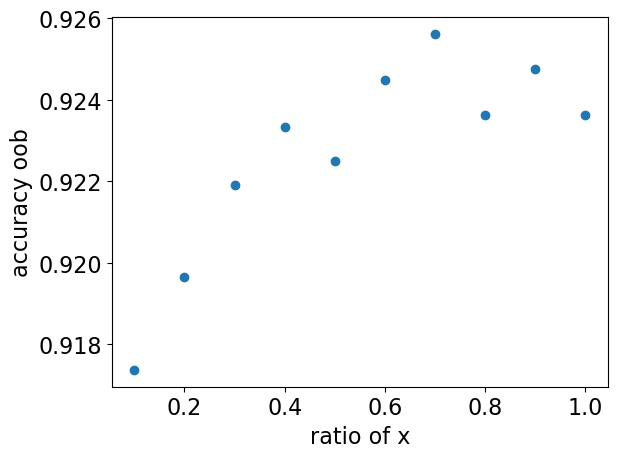

最適なx: 0.7000000000000001


importance
Al / Si              0.103596
Na / Si              0.070964
F / Si               0.003215
H2O / Si             0.042997
sda1 / Si            0.050251
...                       ...
fr_Ndealkylation2    0.005857
fr_bicyclic          0.000600
fr_piperdine         0.000559
fr_quatN             0.000382
fr_unbrch_alkane     0.001309

[76 rows x 1 columns]

False  True
False   2054    12
True      11  1445

False  True
False    639    50
True      43   443

正解率(Accuracy) : 訓練 0.9934696195343555, 検証 0.9208510638297872
適合率(Precision) : 訓練 0.9917638984214139, 検証 0.8985801217038539
再現率(Recall) : 訓練 0.992445054945055, 検証 0.911522633744856
F1スコア : 訓練 0.9921043597665636, 検証 0.9050051072522982


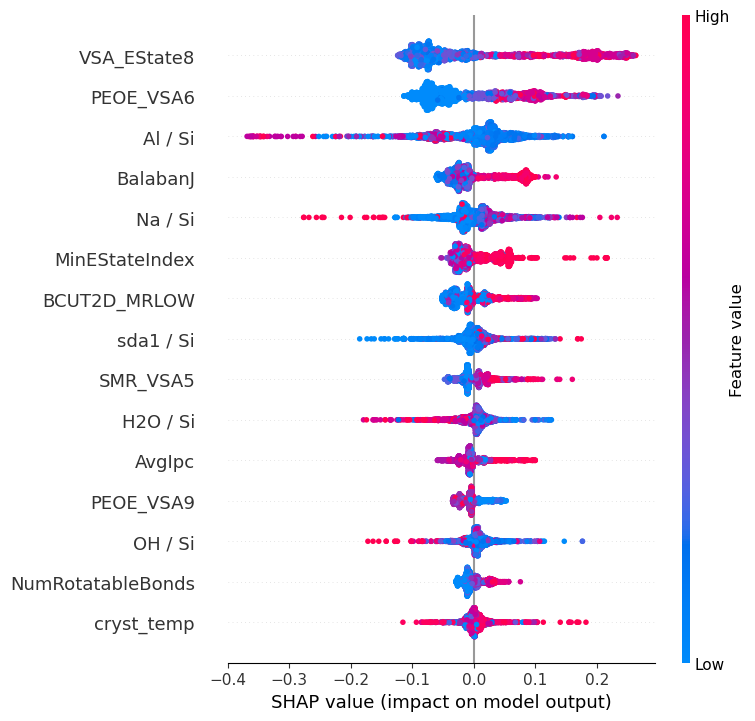

In [1]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 84].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# bea

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951    False
29952    False
29977     True
29978     True
Name: bea, Length: 4697, dtype: object

bea
False    4233
True      464
Name: count, dtype: int64

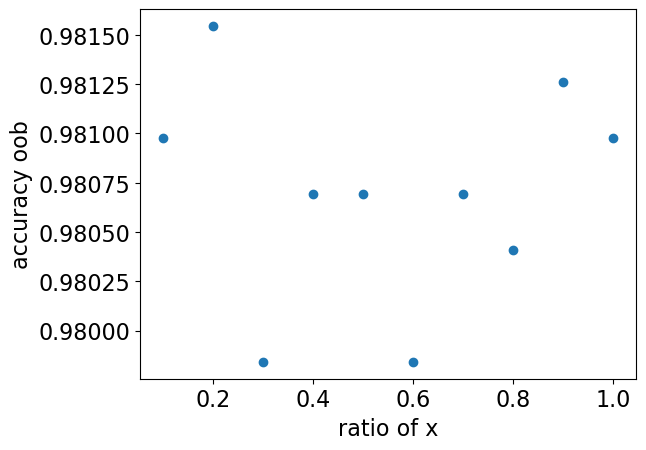

最適なx: 0.2


importance
Al / Si              0.077859
Na / Si              0.054607
F / Si               0.006899
H2O / Si             0.068181
sda1 / Si            0.066423
...                       ...
fr_Ndealkylation2    0.004378
fr_bicyclic          0.002669
fr_piperdine         0.001813
fr_quatN             0.000551
fr_unbrch_alkane     0.000466

[76 rows x 1 columns]

False  True
False   3173     1
True       3   345

False  True
False   1040    19
True      16   100

正解率(Accuracy) : 訓練 0.9988642816581488, 検証 0.9702127659574468
適合率(Precision) : 訓練 0.9971098265895953, 検証 0.8403361344537815
再現率(Recall) : 訓練 0.9913793103448276, 検証 0.8620689655172413
F1スコア : 訓練 0.9942363112391931, 検証 0.851063829787234


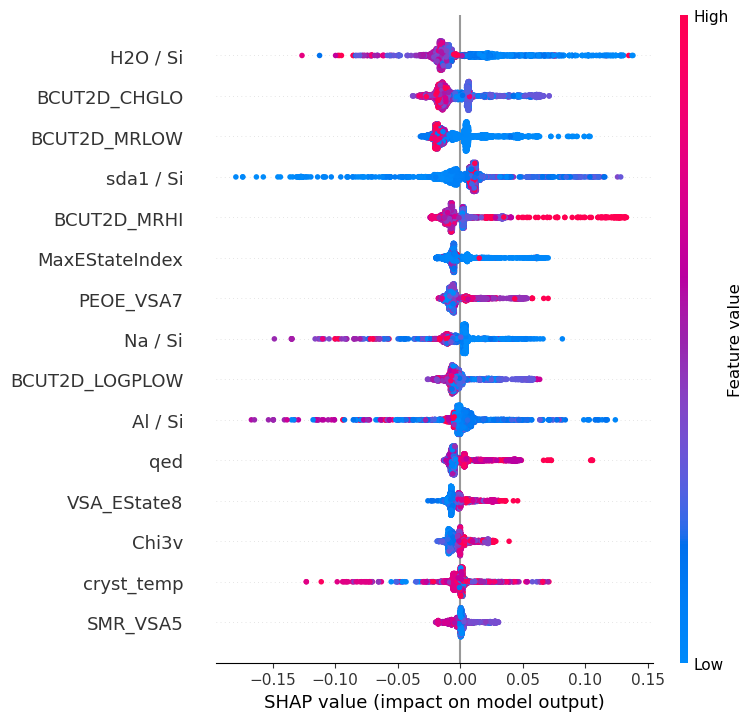

In [2]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 85].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# mtt

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: mtt, Length: 4697, dtype: object

mtt
False    4192
True      505
Name: count, dtype: int64

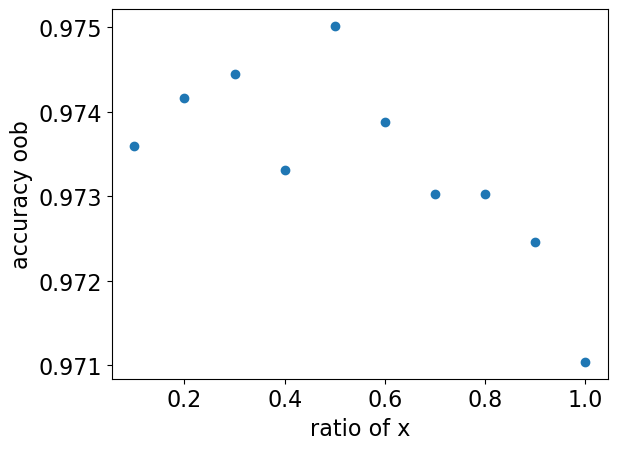

最適なx: 0.5


importance
Al / Si              0.079418
Na / Si              0.098460
F / Si               0.006975
H2O / Si             0.063066
sda1 / Si            0.052535
...                       ...
fr_Ndealkylation2    0.001311
fr_bicyclic          0.001341
fr_piperdine         0.001138
fr_quatN             0.001386
fr_unbrch_alkane     0.005464

[76 rows x 1 columns]

False  True
False   3141     2
True       4   375

False  True
False   1026    23
True      17   109

正解率(Accuracy) : 訓練 0.9982964224872232, 検証 0.9659574468085106
適合率(Precision) : 訓練 0.9946949602122016, 検証 0.8257575757575758
再現率(Recall) : 訓練 0.9894459102902374, 検証 0.8650793650793651
F1スコア : 訓練 0.9920634920634921, 検証 0.8449612403100775


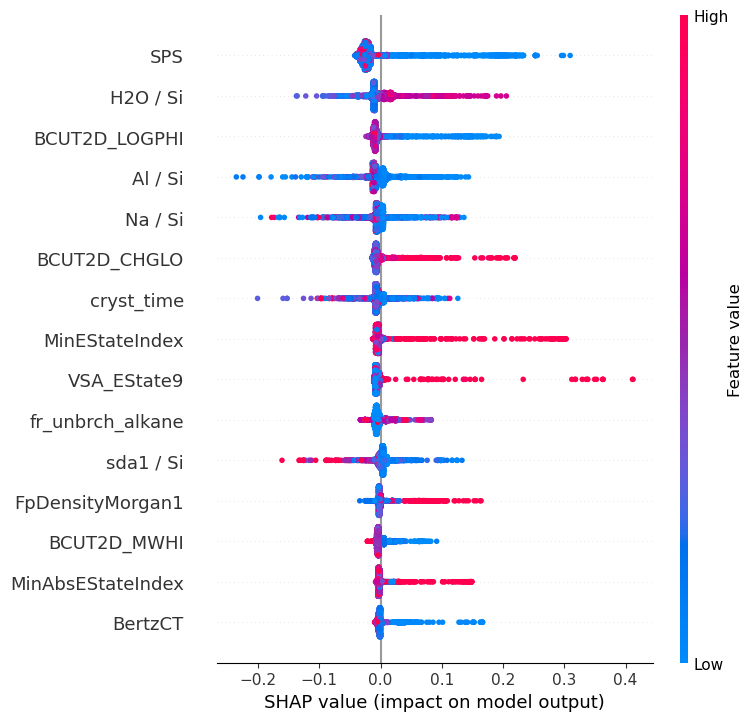

In [3]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 86].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# cas

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951     True
29952     True
29977    False
29978    False
Name: cas, Length: 4697, dtype: object

cas
False    3357
True     1340
Name: count, dtype: int64

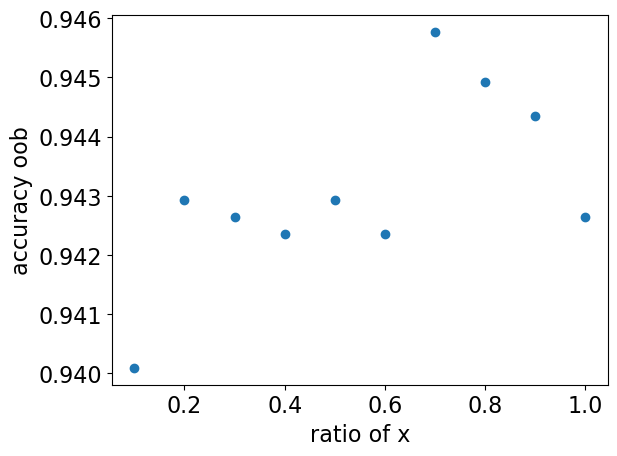

最適なx: 0.7000000000000001


importance
Al / Si              0.163471
Na / Si              0.059109
F / Si               0.003348
H2O / Si             0.030617
sda1 / Si            0.032149
...                       ...
fr_Ndealkylation2    0.000621
fr_bicyclic          0.001170
fr_piperdine         0.000763
fr_quatN             0.000315
fr_unbrch_alkane     0.005888

[76 rows x 1 columns]

False  True
False   2509     8
True       4  1001

False  True
False    817    23
True      44   291

正解率(Accuracy) : 訓練 0.9965928449744463, 検証 0.9429787234042554
適合率(Precision) : 訓練 0.9920713577799801, 検証 0.9267515923566879
再現率(Recall) : 訓練 0.9960199004975124, 検証 0.8686567164179104
F1スコア : 訓練 0.9940417080436942, 検証 0.8967642526964561


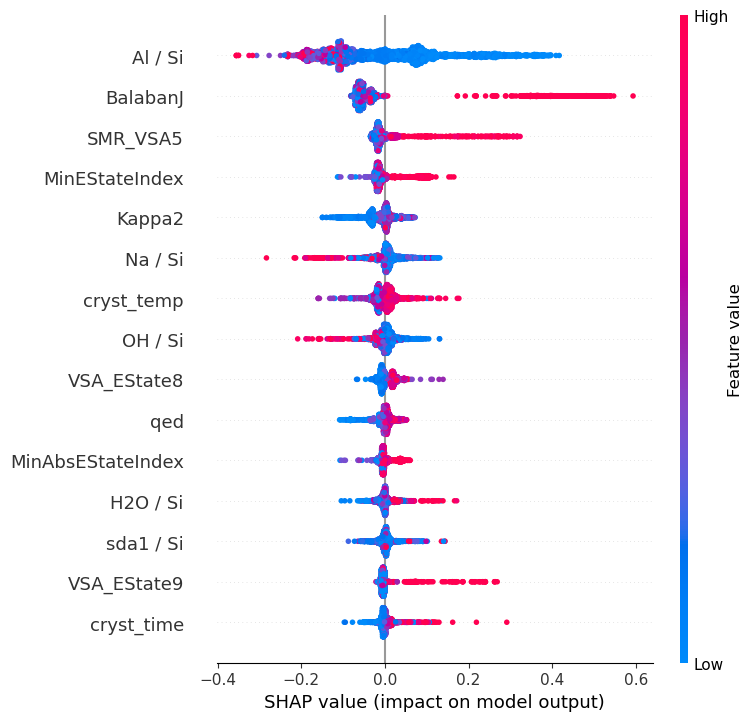

In [4]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 87].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# d6r

249      False
250      False
251       True
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: d6r, Length: 4697, dtype: object

d6r
False    3705
True      992
Name: count, dtype: int64

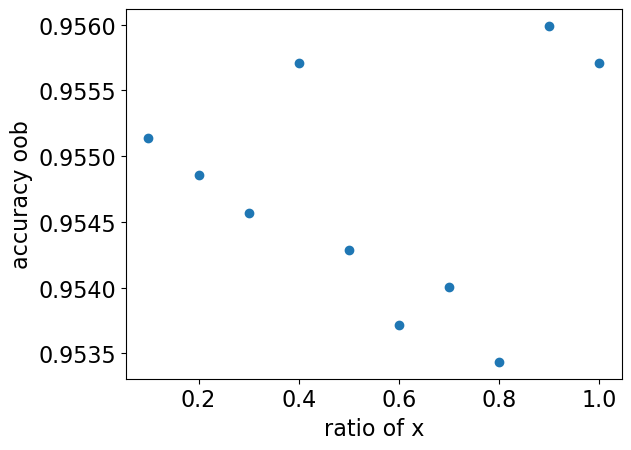

最適なx: 0.9


importance
Al / Si              0.095891
Na / Si              0.056406
F / Si               0.004607
H2O / Si             0.060339
sda1 / Si            0.064075
...                       ...
fr_Ndealkylation2    0.000864
fr_bicyclic          0.000237
fr_piperdine         0.001647
fr_quatN             0.000477
fr_unbrch_alkane     0.000555

[76 rows x 1 columns]

False  True
False   2772     6
True       5   739

False  True
False    899    28
True      40   208

正解率(Accuracy) : 訓練 0.9968767745599092, 検証 0.9421276595744681
適合率(Precision) : 訓練 0.9919463087248322, 検証 0.8813559322033898
再現率(Recall) : 訓練 0.9932795698924731, 検証 0.8387096774193549
F1スコア : 訓練 0.9926124916051041, 検証 0.859504132231405


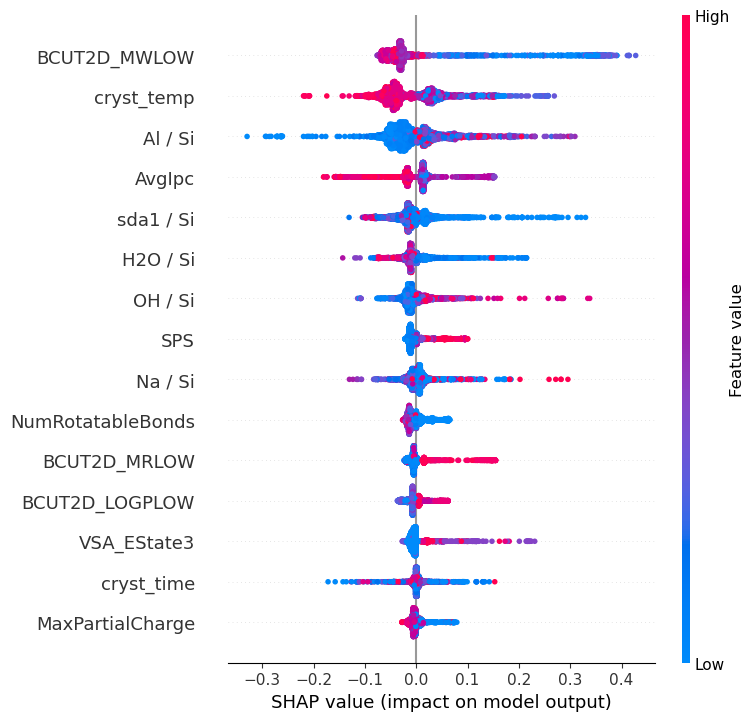

In [5]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 88].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# fer

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: fer, Length: 4697, dtype: object

fer
False    4455
True      242
Name: count, dtype: int64

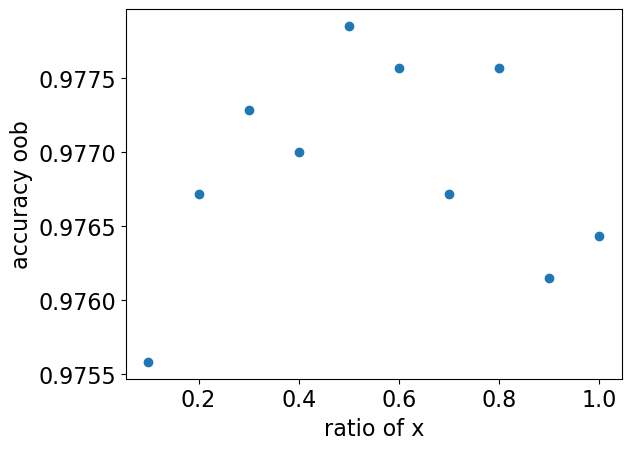

最適なx: 0.5


importance
Al / Si              0.149435
Na / Si              0.134281
F / Si               0.012711
H2O / Si             0.057637
sda1 / Si            0.062624
...                       ...
fr_Ndealkylation2    0.001640
fr_bicyclic          0.000050
fr_piperdine         0.000090
fr_quatN             0.000282
fr_unbrch_alkane     0.001516

[76 rows x 1 columns]

False  True
False   3335     6
True       5   176

False  True
False   1106     8
True      14    47

正解率(Accuracy) : 訓練 0.9968767745599092, 検証 0.9812765957446808
適合率(Precision) : 訓練 0.967032967032967, 検証 0.8545454545454545
再現率(Recall) : 訓練 0.9723756906077348, 検証 0.7704918032786885
F1スコア : 訓練 0.9696969696969697, 検証 0.8103448275862069


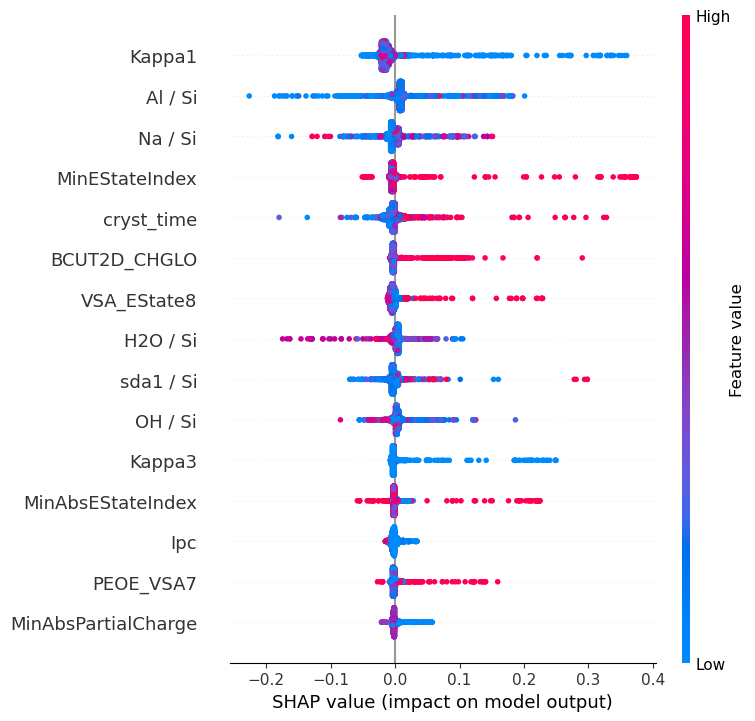

In [6]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 89].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# mel

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951     True
29952     True
29977    False
29978    False
Name: mel, Length: 4697, dtype: object

mel
False    3364
True     1333
Name: count, dtype: int64

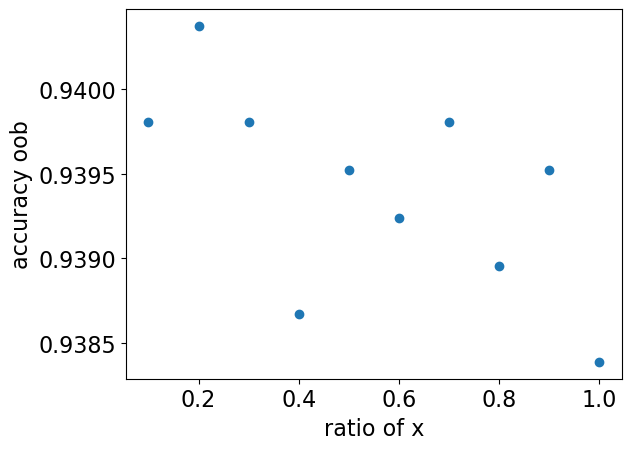

最適なx: 0.2


importance
Al / Si              0.084897
Na / Si              0.054906
F / Si               0.004446
H2O / Si             0.025288
sda1 / Si            0.038737
...                       ...
fr_Ndealkylation2    0.000397
fr_bicyclic          0.000452
fr_piperdine         0.000391
fr_quatN             0.000939
fr_unbrch_alkane     0.002411

[76 rows x 1 columns]

False  True
False   2516     6
True       2   998

False  True
False    803    39
True      42   291

正解率(Accuracy) : 訓練 0.9977285633162976, 検証 0.931063829787234
適合率(Precision) : 訓練 0.9940239043824701, 検証 0.8818181818181818
再現率(Recall) : 訓練 0.998, 検証 0.8738738738738738
F1スコア : 訓練 0.9960079840319361, 検証 0.8778280542986425


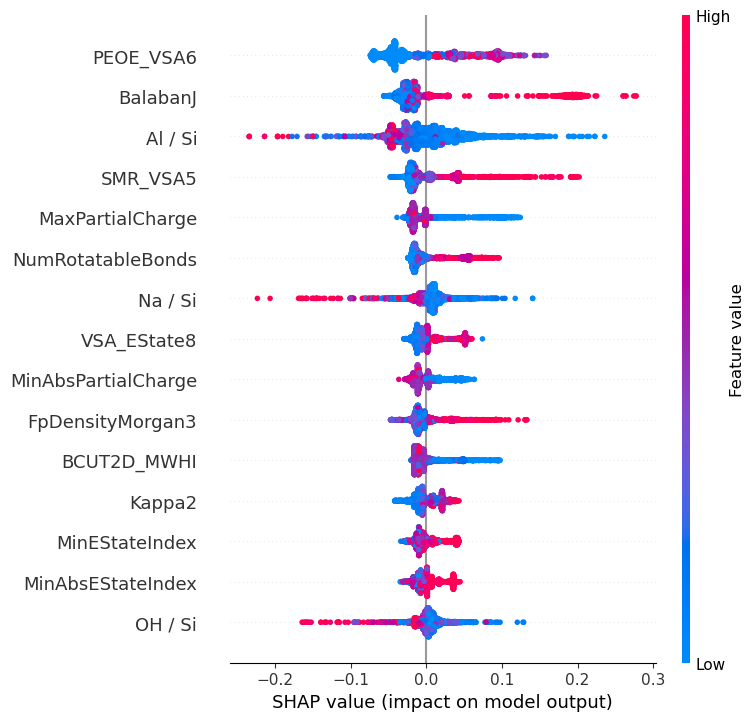

In [7]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 90].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# mfi

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951     True
29952     True
29977    False
29978    False
Name: mfi, Length: 4697, dtype: object

mfi
False    3502
True     1195
Name: count, dtype: int64

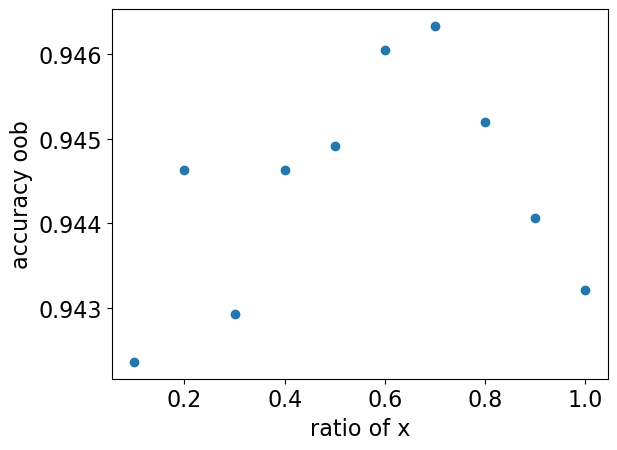

最適なx: 0.7000000000000001


importance
Al / Si              0.092267
Na / Si              0.051935
F / Si               0.003606
H2O / Si             0.023317
sda1 / Si            0.031975
...                       ...
fr_Ndealkylation2    0.000425
fr_bicyclic          0.000288
fr_piperdine         0.000378
fr_quatN             0.000231
fr_unbrch_alkane     0.001337

[76 rows x 1 columns]

False  True
False   2621     5
True       5   891

False  True
False    851    25
True      34   265

正解率(Accuracy) : 訓練 0.997160704145372, 検証 0.9497872340425532
適合率(Precision) : 訓練 0.9944196428571429, 検証 0.9137931034482759
再現率(Recall) : 訓練 0.9944196428571429, 検証 0.8862876254180602
F1スコア : 訓練 0.9944196428571429, 検証 0.8998302207130731


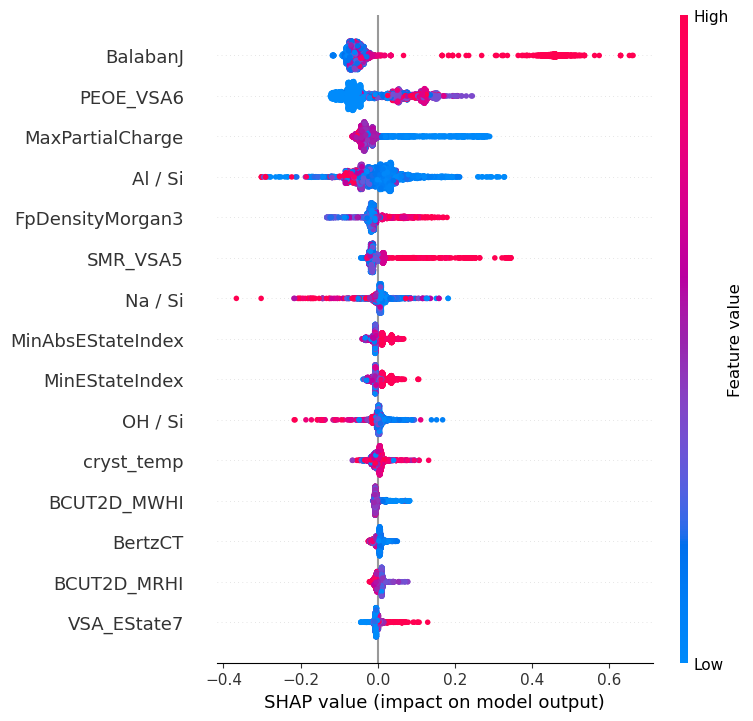

In [8]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 91].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# mtw

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951    False
29952    False
29977     True
29978     True
Name: mtw, Length: 4697, dtype: object

mtw
False    4051
True      646
Name: count, dtype: int64

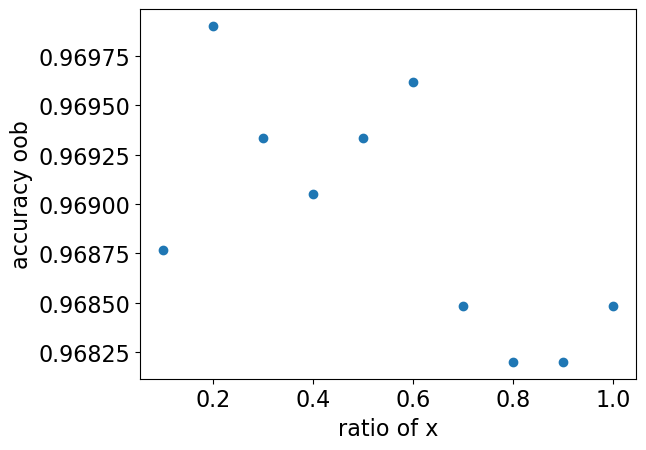

最適なx: 0.2


importance
Al / Si              0.078136
Na / Si              0.064989
F / Si               0.005622
H2O / Si             0.045085
sda1 / Si            0.047691
...                       ...
fr_Ndealkylation2    0.003368
fr_bicyclic          0.001713
fr_piperdine         0.002034
fr_quatN             0.001199
fr_unbrch_alkane     0.001429

[76 rows x 1 columns]

False  True
False   3036     2
True       5   479

False  True
False    997    16
True      21   141

正解率(Accuracy) : 訓練 0.9980124929017604, 検証 0.9685106382978723
適合率(Precision) : 訓練 0.9958419958419958, 検証 0.8980891719745223
再現率(Recall) : 訓練 0.9896694214876033, 検証 0.8703703703703703
F1スコア : 訓練 0.9927461139896373, 検証 0.8840125391849529


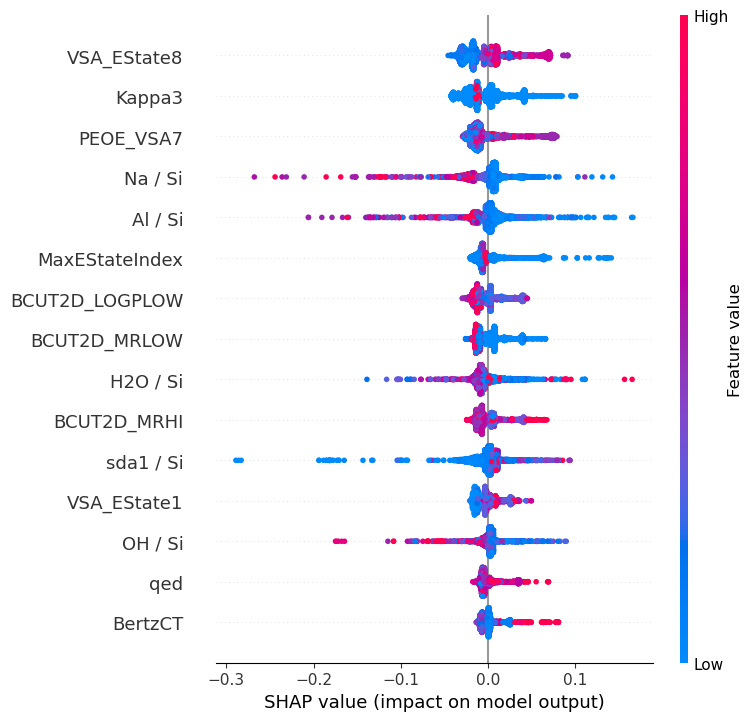

In [9]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 92].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# ton

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: ton, Length: 4697, dtype: object

ton
False    4306
True      391
Name: count, dtype: int64

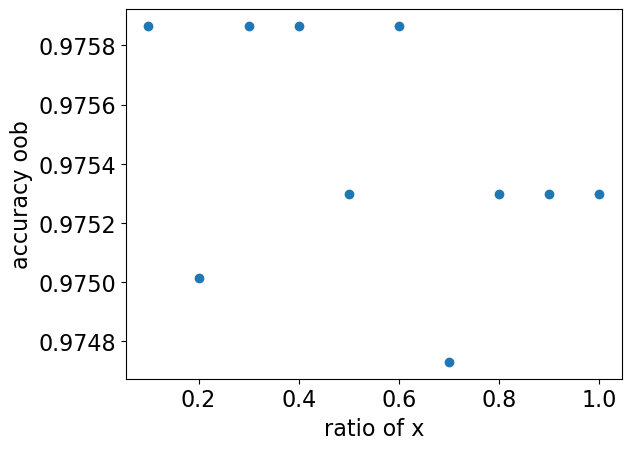

最適なx: 0.1


importance
Al / Si              0.070266
Na / Si              0.063444
F / Si               0.008020
H2O / Si             0.043487
sda1 / Si            0.050666
...                       ...
fr_Ndealkylation2    0.000124
fr_bicyclic          0.001137
fr_piperdine         0.000761
fr_quatN             0.006868
fr_unbrch_alkane     0.008377

[76 rows x 1 columns]

False  True
False   3229     0
True       3   290

False  True
False   1061    16
True       8    90

正解率(Accuracy) : 訓練 0.9991482112436116, 検証 0.9795744680851064
適合率(Precision) : 訓練 1.0, 検証 0.8490566037735849
再現率(Recall) : 訓練 0.9897610921501706, 検証 0.9183673469387755
F1スコア : 訓練 0.9948542024013722, 検証 0.8823529411764706


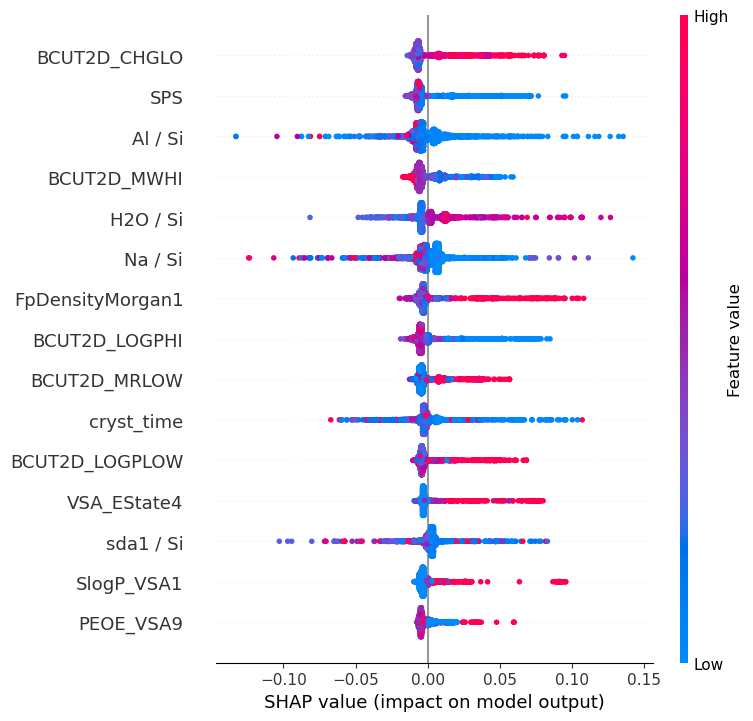

In [10]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 93].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# non

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: non, Length: 4697, dtype: object

non
False    4579
True      118
Name: count, dtype: int64

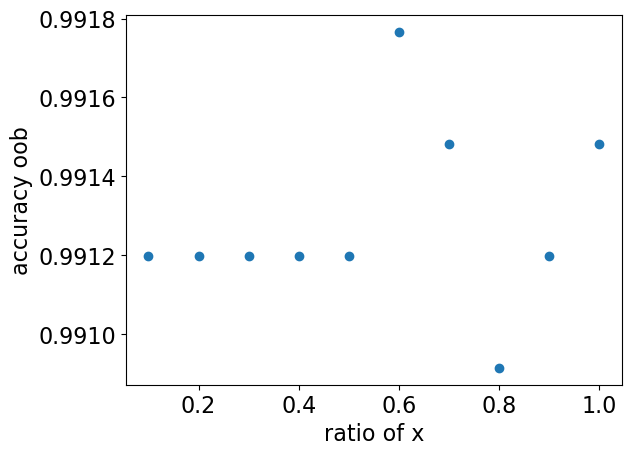

最適なx: 0.6


importance
Al / Si              0.071193
Na / Si              0.055625
F / Si               0.011793
H2O / Si             0.038483
sda1 / Si            0.029003
...                       ...
fr_Ndealkylation2    0.001405
fr_bicyclic          0.001946
fr_piperdine         0.003935
fr_quatN             0.001731
fr_unbrch_alkane     0.001868

[76 rows x 1 columns]

False  True
False   3434     0
True       0    88

False  True
False   1138     7
True       6    24

正解率(Accuracy) : 訓練 1.0, 検証 0.9889361702127659
適合率(Precision) : 訓練 1.0, 検証 0.7741935483870968
再現率(Recall) : 訓練 1.0, 検証 0.8
F1スコア : 訓練 1.0, 検証 0.7868852459016393


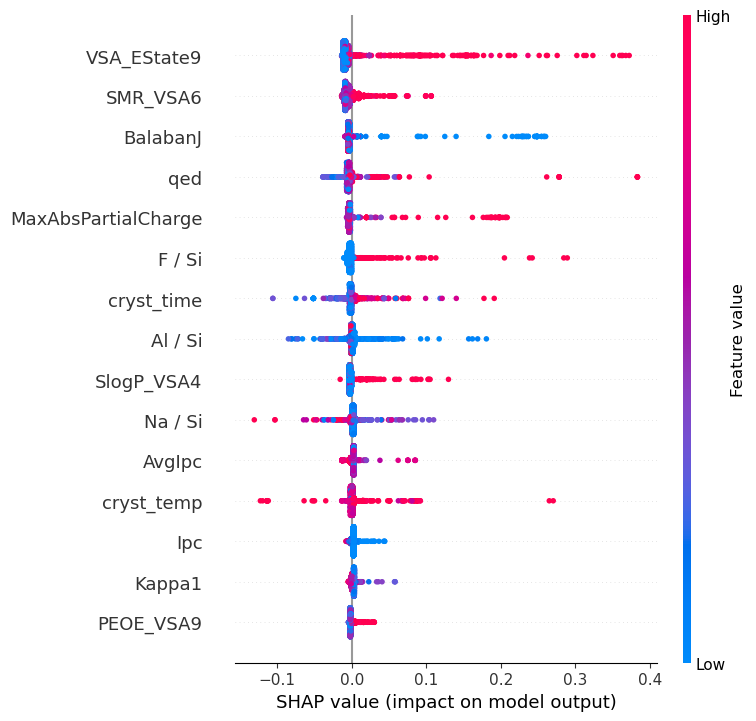

In [11]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 94].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# d8r

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: d8r, Length: 4697, dtype: object

d8r
False    4671
True       26
Name: count, dtype: int64

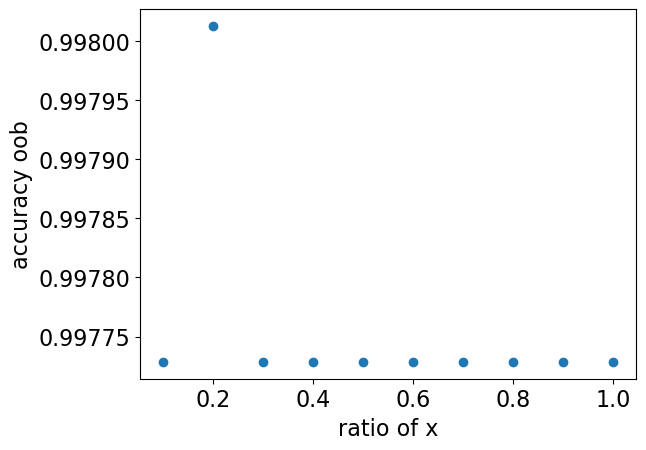

最適なx: 0.2


importance
Al / Si              0.072724
Na / Si              0.086937
F / Si               0.004934
H2O / Si             0.131222
sda1 / Si            0.121975
...                       ...
fr_Ndealkylation2    0.000078
fr_bicyclic          0.000000
fr_piperdine         0.000027
fr_quatN             0.000001
fr_unbrch_alkane     0.000205

[76 rows x 1 columns]

False  True
False   3503     0
True       1    18

False  True
False   1168     0
True       5     2

正解率(Accuracy) : 訓練 0.9997160704145373, 検証 0.9957446808510638
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 0.9473684210526315, 検証 0.2857142857142857
F1スコア : 訓練 0.972972972972973, 検証 0.4444444444444444


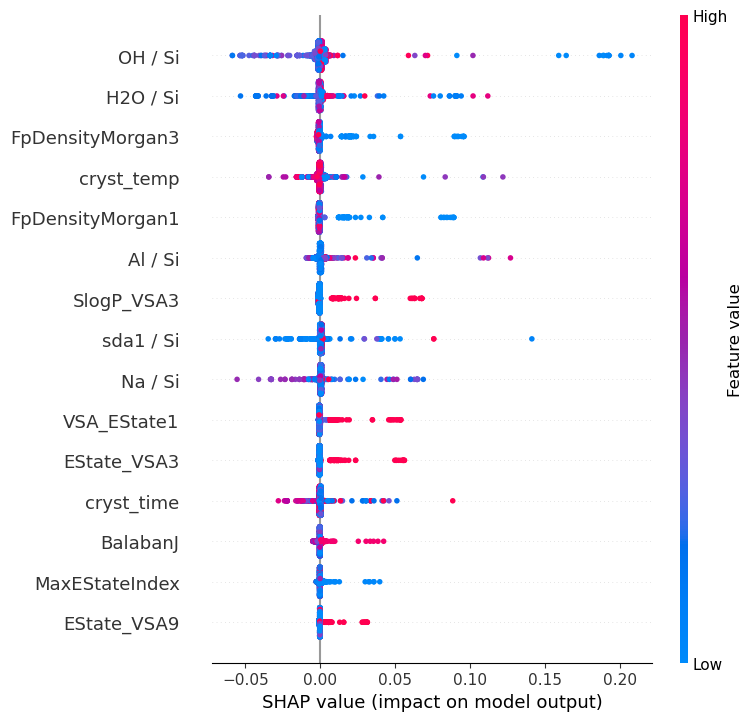

In [12]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 95].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# can

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: can, Length: 4697, dtype: object

can
False    4543
True      154
Name: count, dtype: int64

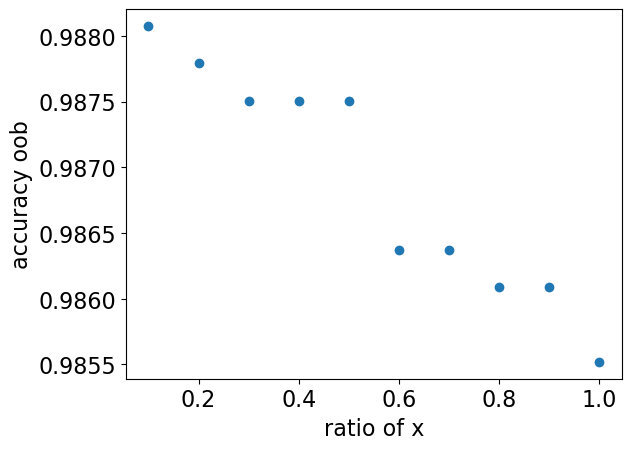

最適なx: 0.1


importance
Al / Si              0.091879
Na / Si              0.126022
F / Si               0.000993
H2O / Si             0.089945
sda1 / Si            0.133200
...                       ...
fr_Ndealkylation2    0.000595
fr_bicyclic          0.000068
fr_piperdine         0.000186
fr_quatN             0.001344
fr_unbrch_alkane     0.000342

[76 rows x 1 columns]

False  True
False   3406     1
True       8   107

False  True
False   1130     6
True       8    31

正解率(Accuracy) : 訓練 0.9974446337308348, 検証 0.9880851063829788
適合率(Precision) : 訓練 0.9907407407407407, 検証 0.8378378378378378
再現率(Recall) : 訓練 0.9304347826086956, 検証 0.7948717948717948
F1スコア : 訓練 0.9596412556053812, 検証 0.8157894736842105


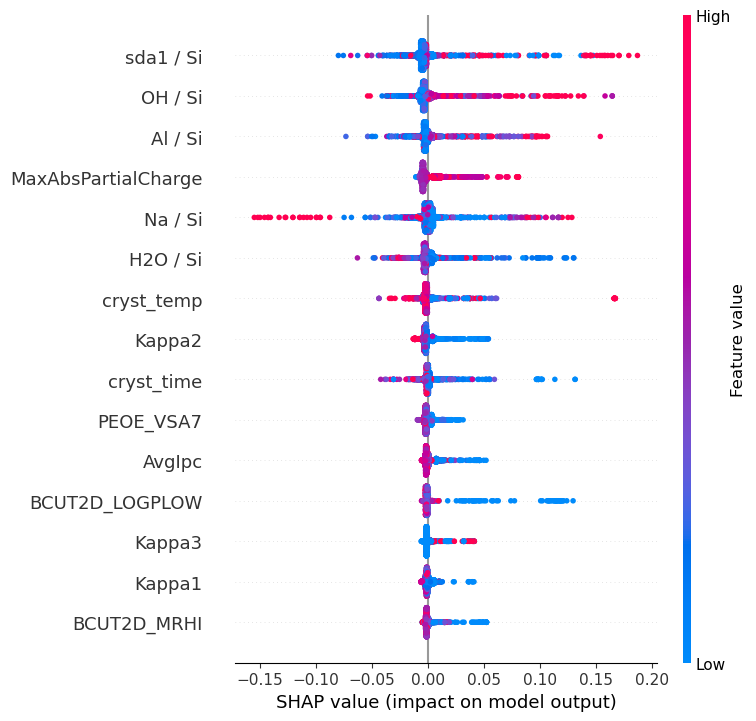

In [13]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 96].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# phi

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: phi, Length: 4697, dtype: object

phi
False    4581
True      116
Name: count, dtype: int64

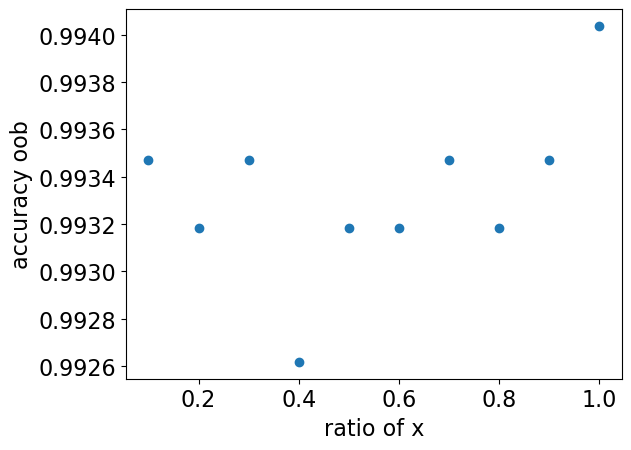

最適なx: 1.0


importance
Al / Si              0.094647
Na / Si              0.096776
F / Si               0.086442
H2O / Si             0.015582
sda1 / Si            0.058077
...                       ...
fr_Ndealkylation2    0.000057
fr_bicyclic          0.000067
fr_piperdine         0.000019
fr_quatN             0.000104
fr_unbrch_alkane     0.000000

[76 rows x 1 columns]

False  True
False   3432     3
True       1    86

False  True
False   1135    11
True       2    27

正解率(Accuracy) : 訓練 0.9988642816581488, 検証 0.9889361702127659
適合率(Precision) : 訓練 0.9662921348314607, 検証 0.7105263157894737
再現率(Recall) : 訓練 0.9885057471264368, 検証 0.9310344827586207
F1スコア : 訓練 0.9772727272727273, 検証 0.8059701492537313


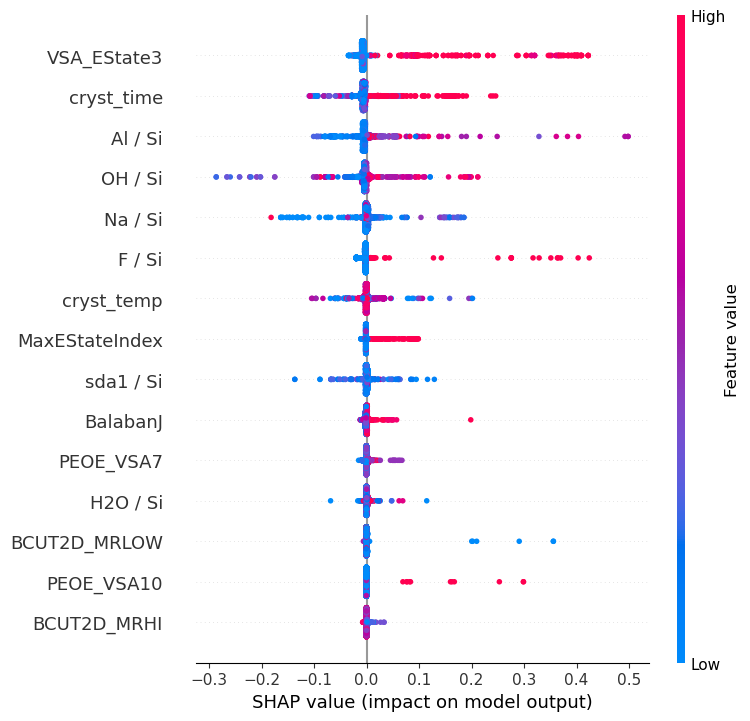

In [14]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 97].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# sod

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: sod, Length: 4697, dtype: object

sod
False    4395
True      302
Name: count, dtype: int64

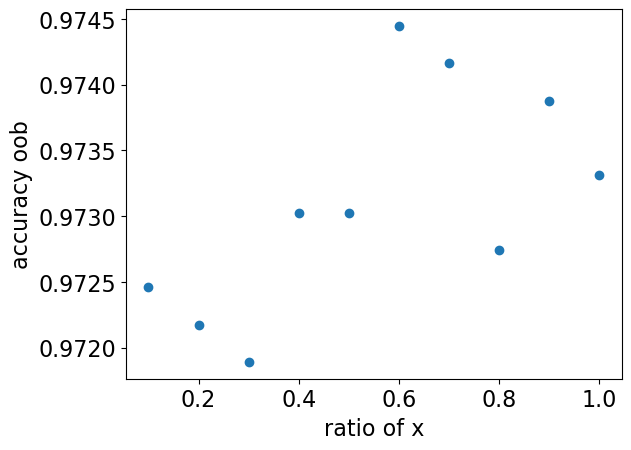

最適なx: 0.6


importance
Al / Si              0.211915
Na / Si              0.096749
F / Si               0.000692
H2O / Si             0.058965
sda1 / Si            0.095767
...                       ...
fr_Ndealkylation2    0.000526
fr_bicyclic          0.000166
fr_piperdine         0.001022
fr_quatN             0.000526
fr_unbrch_alkane     0.000203

[76 rows x 1 columns]

False  True
False   3292     4
True       8   218

False  True
False   1088    11
True      16    60

正解率(Accuracy) : 訓練 0.9965928449744463, 検証 0.9770212765957447
適合率(Precision) : 訓練 0.9819819819819819, 検証 0.8450704225352113
再現率(Recall) : 訓練 0.9646017699115044, 検証 0.7894736842105263
F1スコア : 訓練 0.9732142857142857, 検証 0.8163265306122449


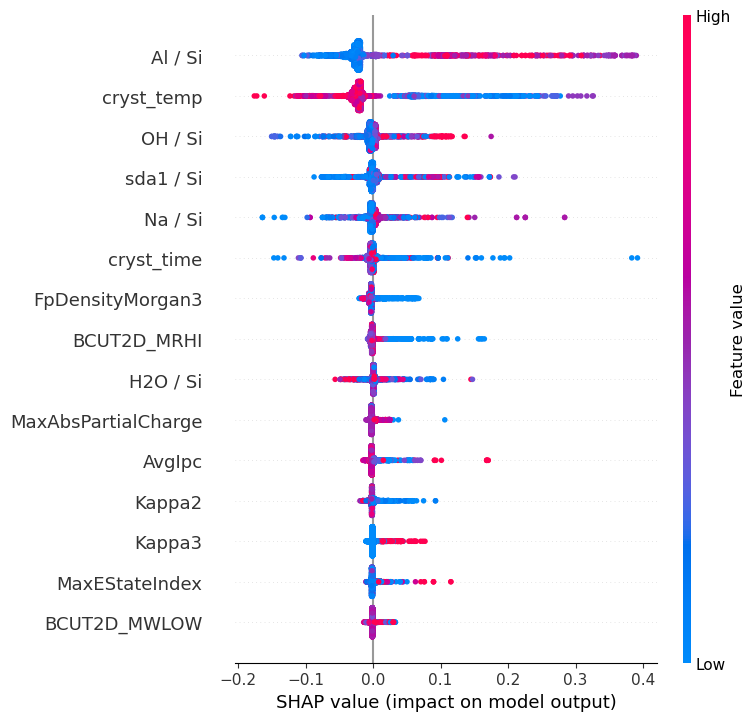

In [15]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 98].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# gme

249      False
250      False
251       True
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: gme, Length: 4697, dtype: object

gme
False    4529
True      168
Name: count, dtype: int64

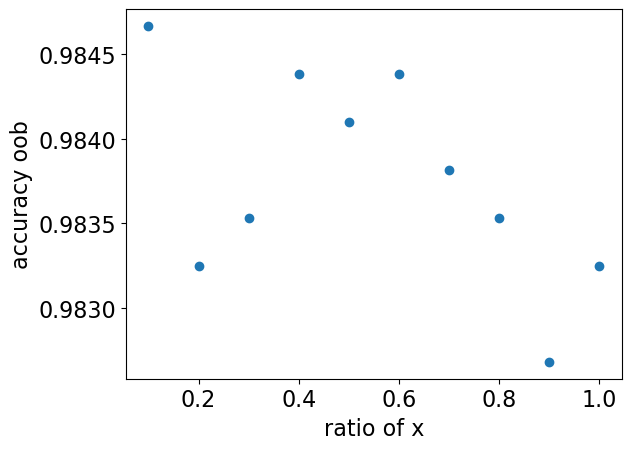

最適なx: 0.1


importance
Al / Si              0.104808
Na / Si              0.141814
F / Si               0.000580
H2O / Si             0.097095
sda1 / Si            0.097336
...                       ...
fr_Ndealkylation2    0.001953
fr_bicyclic          0.000073
fr_piperdine         0.002558
fr_quatN             0.001363
fr_unbrch_alkane     0.000127

[76 rows x 1 columns]

False  True
False   3391     5
True       8   118

False  True
False   1123    10
True       7    35

正解率(Accuracy) : 訓練 0.9963089153889836, 検証 0.985531914893617
適合率(Precision) : 訓練 0.959349593495935, 検証 0.7777777777777778
再現率(Recall) : 訓練 0.9365079365079365, 検証 0.8333333333333334
F1スコア : 訓練 0.9477911646586346, 検証 0.8045977011494253


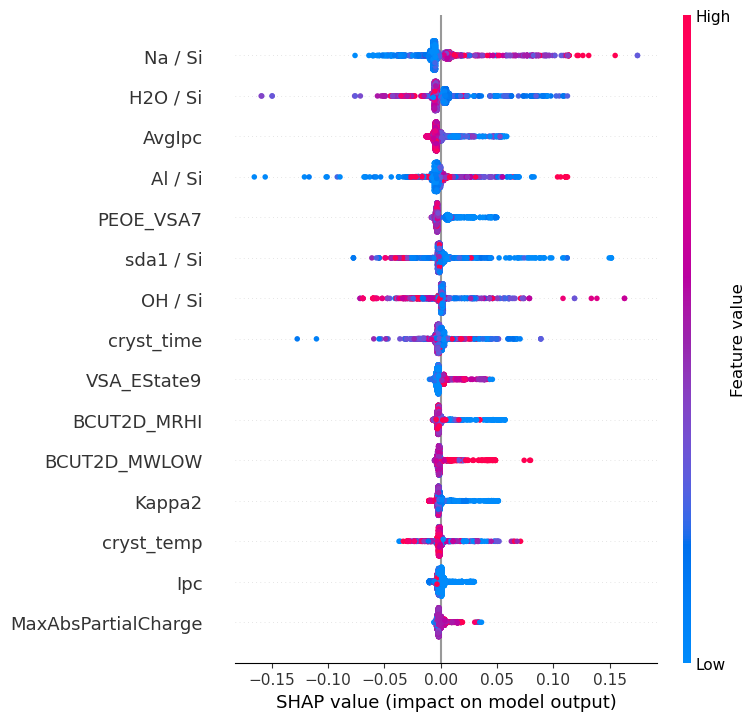

In [16]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 99].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# pau

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: pau, Length: 4697, dtype: object

pau
False    4671
True       26
Name: count, dtype: int64

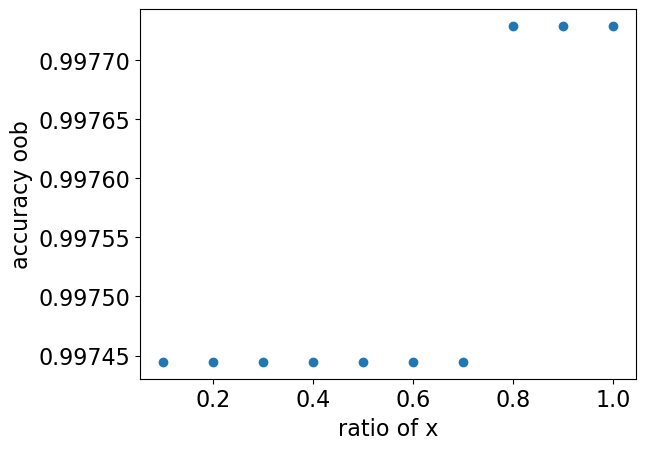

最適なx: 0.8


importance
Al / Si              0.153511
Na / Si              0.067178
F / Si               0.000553
H2O / Si             0.049719
sda1 / Si            0.118504
...                       ...
fr_Ndealkylation2    0.000083
fr_bicyclic          0.000084
fr_piperdine         0.000217
fr_quatN             0.001314
fr_unbrch_alkane     0.000215

[76 rows x 1 columns]

False  True
False   3503     0
True       1    18

False  True
False   1168     0
True       4     3

正解率(Accuracy) : 訓練 0.9997160704145373, 検証 0.9965957446808511
適合率(Precision) : 訓練 1.0, 検証 1.0
再現率(Recall) : 訓練 0.9473684210526315, 検証 0.42857142857142855
F1スコア : 訓練 0.972972972972973, 検証 0.6


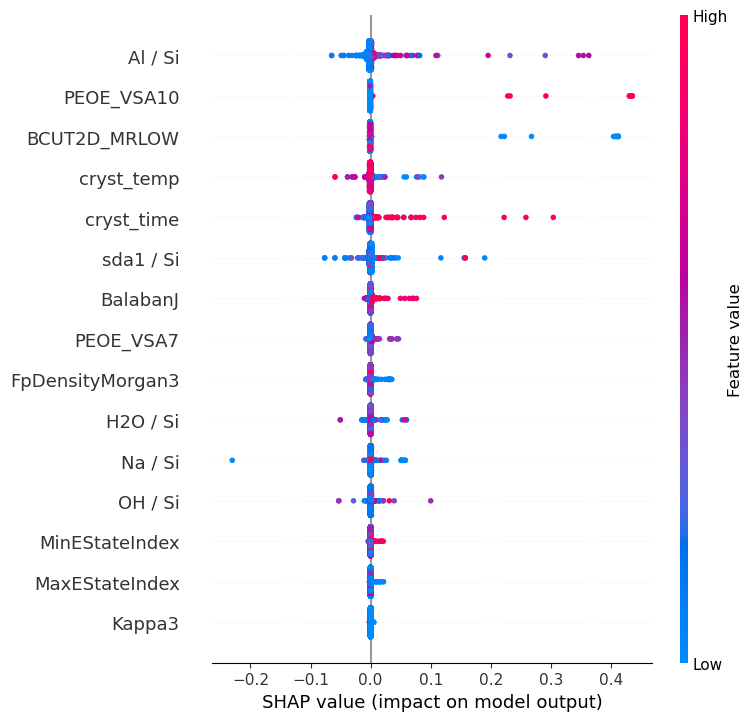

In [17]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 100].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# lta

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: lta, Length: 4697, dtype: object

lta
False    4577
True      120
Name: count, dtype: int64

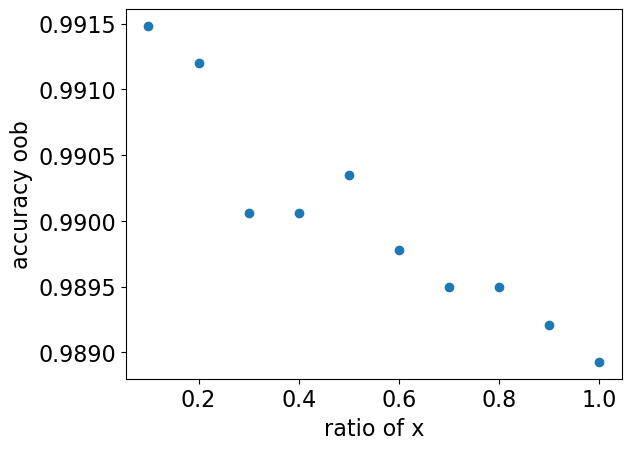

最適なx: 0.1


importance
Al / Si              0.089016
Na / Si              0.089073
F / Si               0.000588
H2O / Si             0.084747
sda1 / Si            0.127152
...                       ...
fr_Ndealkylation2    0.000000
fr_bicyclic          0.000888
fr_piperdine         0.000029
fr_quatN             0.001130
fr_unbrch_alkane     0.000254

[76 rows x 1 columns]

False  True
False   3432     0
True       0    90

False  True
False   1139     6
True       7    23

正解率(Accuracy) : 訓練 1.0, 検証 0.9889361702127659
適合率(Precision) : 訓練 1.0, 検証 0.7931034482758621
再現率(Recall) : 訓練 1.0, 検証 0.7666666666666667
F1スコア : 訓練 1.0, 検証 0.7796610169491526


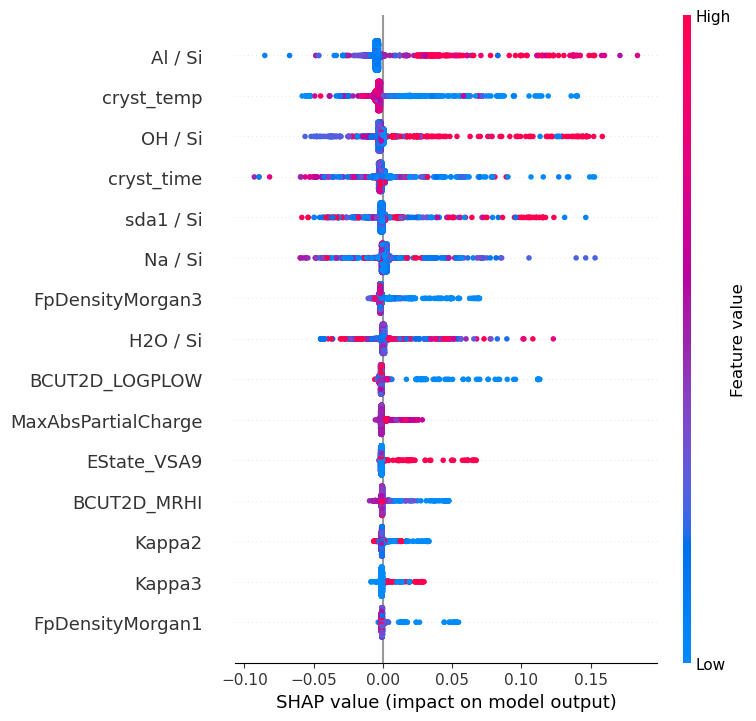

In [18]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 101].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer=shap.TreeExplainer(model)
P=explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

249      False
250      False
251      False
252      False
253      False
         ...  
29950    False
29951    False
29952    False
29977    False
29978    False
Name: jbw, Length: 4697, dtype: object

jbw
False    4148
True      549
Name: count, dtype: int64

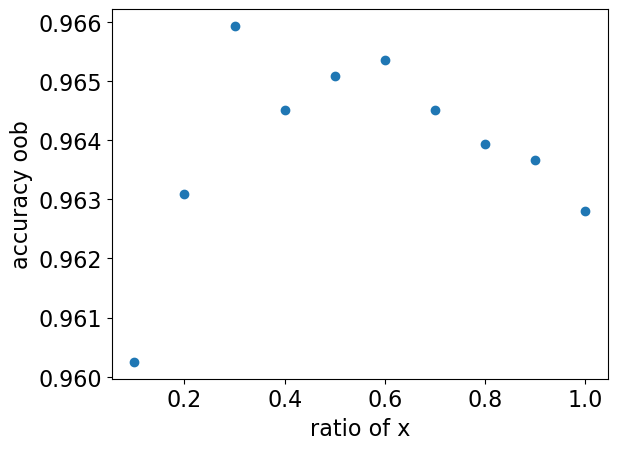

最適なx: 0.30000000000000004


importance
Al / Si              0.119226
Na / Si              0.067242
F / Si               0.004157
H2O / Si             0.066458
sda1 / Si            0.046065
...                       ...
fr_Ndealkylation2    0.001225
fr_bicyclic          0.001364
fr_piperdine         0.001032
fr_quatN             0.003486
fr_unbrch_alkane     0.003137

[76 rows x 1 columns]

False  True
False   3107     3
True       3   409

False  True
False   1016    22
True      23   114

正解率(Accuracy) : 訓練 0.9982964224872232, 検証 0.9617021276595744
適合率(Precision) : 訓練 0.9927184466019418, 検証 0.8382352941176471
再現率(Recall) : 訓練 0.9927184466019418, 検証 0.8321167883211679
F1スコア : 訓練 0.9927184466019418, 検証 0.8351648351648352


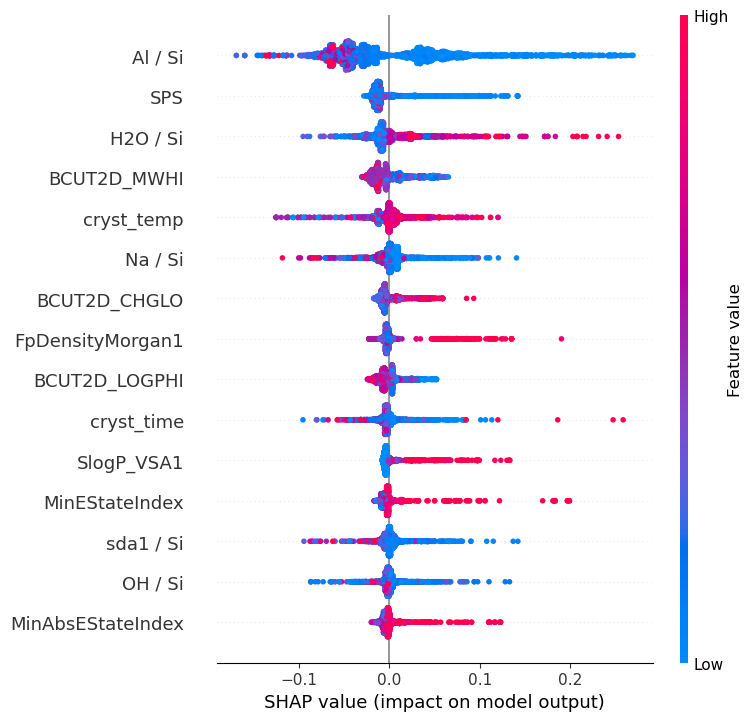

In [19]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU_jbw.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 102].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
P = explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)

# jbw

249      False
250      False
251      False
252      False
253      False
         ...  
29950     True
29951     True
29952     True
29977     True
29978     True
Name: mor, Length: 4697, dtype: object

mor
False    2755
True     1942
Name: count, dtype: int64

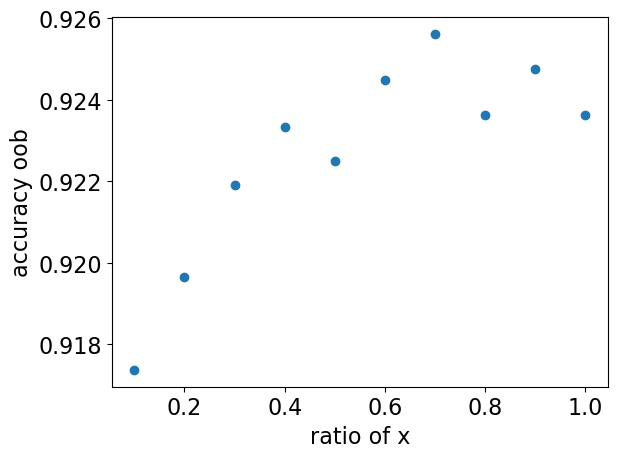

最適なx: 0.7000000000000001


importance
Al / Si              0.103596
Na / Si              0.070964
F / Si               0.003215
H2O / Si             0.042997
sda1 / Si            0.050251
...                       ...
fr_Ndealkylation2    0.005857
fr_bicyclic          0.000600
fr_piperdine         0.000559
fr_quatN             0.000382
fr_unbrch_alkane     0.001309

[76 rows x 1 columns]

False  True
False   2054    12
True      11  1445

False  True
False    639    50
True      43   443

正解率(Accuracy) : 訓練 0.9934696195343555, 検証 0.9208510638297872
適合率(Precision) : 訓練 0.9917638984214139, 検証 0.8985801217038539
再現率(Recall) : 訓練 0.992445054945055, 検証 0.911522633744856
F1スコア : 訓練 0.9921043597665636, 検証 0.9050051072522982


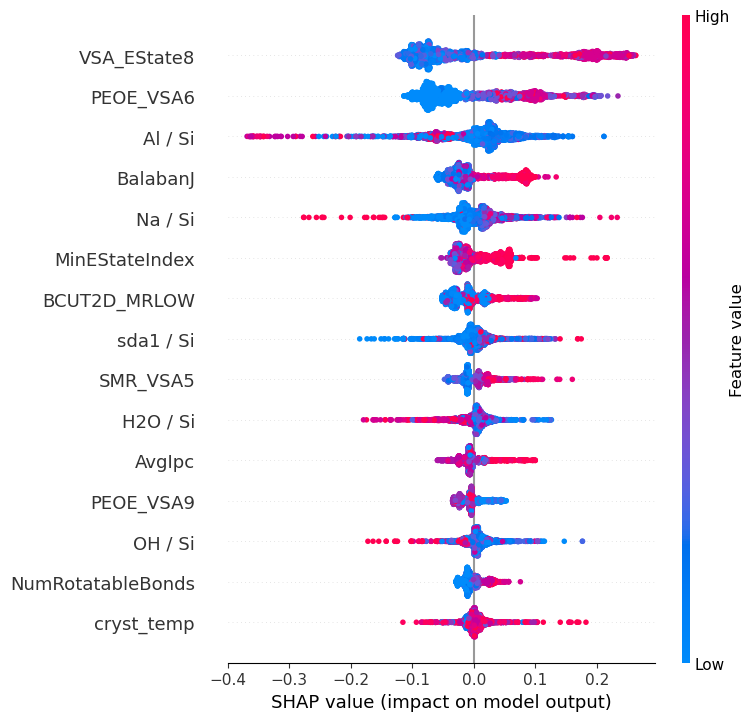

In [20]:
import pandas as pd
dataset=pd.read_csv('dataset_rdkit_CBU.csv', index_col=0, header=0)
x=dataset.iloc[:, :76]
y=dataset.iloc[:, 84].astype(str)
display(y)
display(y.value_counts())
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=4)
from sklearn.ensemble import RandomForestClassifier
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
accuracy_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestClassifier(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=1)
    model_oob.fit(x_train, y_train)
    accuracy_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
plt.scatter(all_ratio_of_xs, accuracy_oob)
plt.xlabel('ratio of x')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[accuracy_oob.index(max(accuracy_oob))]
print(f"最適なx: {optimal_x}")
model=RandomForestClassifier(n_estimators=500, max_features=optimal_x, random_state=1)
model.fit(x_train, y_train)
importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))
from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="True")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="True")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="True")
display(confusion_matrix_train)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="True")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="True")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="True")
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
P = explainer.shap_values(x_train).T
shap.summary_plot(P[1].T, x_train, max_display=15)